In [21]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [22]:
dataDir='/root/data/coco'
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [23]:
coco = COCO(annFile)

loading annotations into memory...
Done (t=1.51s)
creating index...
index created!


In [24]:

# display COCO categories and supercategories
print('cat ids: ',coco.getCatIds())
cats = coco.loadCats(coco.getCatIds())
for cat in cats:
    print(cat, end='\n')
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))
print('COCO categories number: ',len(nms))
nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

cat ids:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90]
{'supercategory': 'person', 'id': 1, 'name': 'person'}
{'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'}
{'supercategory': 'vehicle', 'id': 3, 'name': 'car'}
{'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'}
{'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'}
{'supercategory': 'vehicle', 'id': 6, 'name': 'bus'}
{'supercategory': 'vehicle', 'id': 7, 'name': 'train'}
{'supercategory': 'vehicle', 'id': 8, 'name': 'truck'}
{'supercategory': 'vehicle', 'id': 9, 'name': 'boat'}
{'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'}
{'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'}
{'supercategory': 'outdoor', 'id': 13, 'name': 'sto

In [35]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','dog','skateboard'])
print(catIds)
imgIds = coco.getImgIds(catIds=catIds );
print(imgIds)
imgIds = coco.getImgIds(imgIds = [324158])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
print(img)

[1, 18, 41]
[549220, 324158, 279278]
{'license': 1, 'file_name': '000000324158.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000324158.jpg', 'height': 334, 'width': 500, 'date_captured': '2013-11-19 23:54:06', 'flickr_url': 'http://farm1.staticflickr.com/169/417836491_5bf8762150_z.jpg', 'id': 324158}


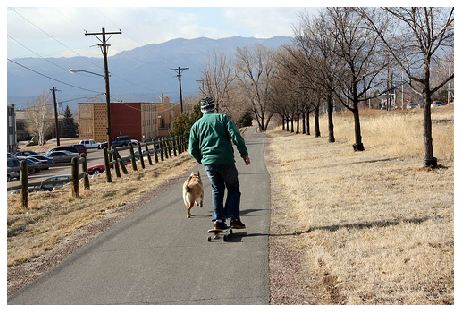

In [37]:

# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
#I = io.imread(img['coco_url']) #从网络读取
I = io.imread('%s/%s/%s'%(dataDir,dataType,img['file_name'])) #从本地读取
plt.axis('off')
plt.imshow(I)
plt.show()

Help on method getAnnIds in module pycocotools.coco:

getAnnIds(imgIds=[], catIds=[], areaRng=[], iscrowd=None) method of pycocotools.coco.COCO instance
    Get ann ids that satisfy given filter conditions. default skips that filter
    :param imgIds  (int array)     : get anns for given imgs
           catIds  (int array)     : get anns for given cats
           areaRng (float array)   : get anns for given area range (e.g. [0 inf])
           iscrowd (boolean)       : get anns for given crowd label (False or True)
    :return: ids (int array)       : integer array of ann ids

Help on method loadAnns in module pycocotools.coco:

loadAnns(ids=[]) method of pycocotools.coco.COCO instance
    Load anns with the specified ids.
    :param ids (int array)       : integer ids specifying anns
    :return: anns (object array) : loaded ann objects

Help on method showAnns in module pycocotools.coco:

showAnns(anns, draw_bbox=False) method of pycocotools.coco.COCO instance
    Display the specifi

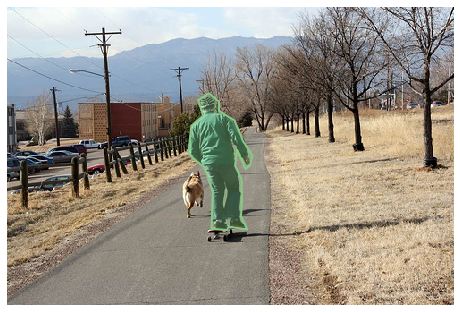

In [46]:

# load and display instance annotations
plt.imshow(I);
plt.axis('off')
help(coco.getAnnIds)
help(coco.loadAnns)
help(coco.showAnns)
annIds = coco.getAnnIds(imgIds=img['id'], catIds=1, iscrowd=None) #catIds参数可以指定显示哪一个类的标注
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [47]:

# initialize COCO api for person keypoints annotations
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=0.41s)
creating index...
index created!


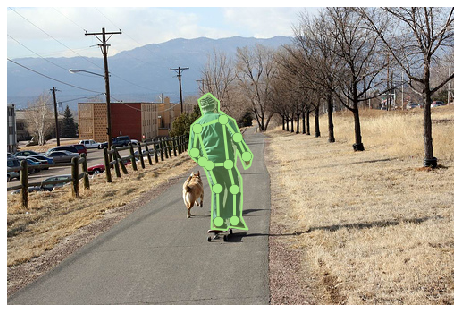

In [12]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

In [13]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.07s)
creating index...
index created!


A man is skate boarding down a path and a dog is running by his side.
A man on a skateboard with a dog outside. 
A person riding a skate board with a dog following beside.
This man is riding a skateboard behind a dog.
A man walking his dog on a quiet country road.


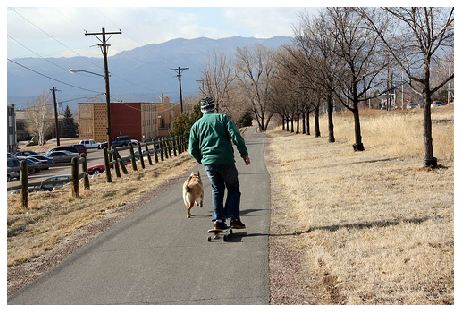

In [14]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()